# **Traditional LSTM | Same Day Predictions | Not Normalized**

In [1]:
import numpy  as np
import pandas as pd

## Read In Datasets

* `msftSameDayNotNorm.csv`
* `appleSameDayNotNorm.csv`
* `djiaSameDayNotNorm.csv`

In [2]:
aaplDf = pd.read_csv('appleSameDayNotNorm.csv')
msftDf = pd.read_csv('msftSameDayNotNorm.csv')
djiaDf = pd.read_csv('djiaSameDayNotNorm.csv')

## Drop Attributes That Can't Be Used as Features

In [3]:
# Stock and Sentiment features

# aaplDf = aaplDf.drop(columns=['Unnamed: 0'])
# msftDf = msftDf.drop(columns=['Unnamed: 0'])
# djiaDf = djiaDf.drop(columns=['Unnamed: 0'])

# Only stock Features

# aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])
# msftDf = msftDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])
# djiaDf = djiaDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])

# Only Sentiment 

aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'Open'])
msftDf = msftDf.drop(columns=['Unnamed: 0', 'Open'])
djiaDf = djiaDf.drop(columns=['Unnamed: 0', 'Open'])

In [4]:
#aaplDf.head()
#msftDf.head()
djiaDf.head()

,neg,neu,pos,compound,label
0,0.218,0.705,0.078,-0.9972,1
1,0.212,0.748,0.040,-0.9943,1
2,0.167,0.732,0.101,-0.9728,0
3,0.150,0.770,0.080,-0.9681,1
4,0.188,0.731,0.081,-0.9952,1


## Split into Data (`x`) and Label (`y`) Sets

In [5]:
yAppl = aaplDf['label']
xAppl = aaplDf.drop(columns = ['label'])

yMsft = msftDf['label']
xMsft = msftDf.drop(columns = ['label'])

yDjia = djiaDf['label']
xDjia = djiaDf.drop(columns = ['label'])

## Split into Train and Test Sets

In [6]:
from sklearn.model_selection import train_test_split
# 90 - 10 : Train - Test Split
xTrainAppl, xTestAppl, yTrainAppl, yTestAppl = train_test_split(xAppl, yAppl, test_size=0.1, shuffle = False)
xTrainMsft, xTestMsft, yTrainMsft, yTestMsft = train_test_split(xMsft, yMsft, test_size=0.1, shuffle = False)
xTrainDjia, xTestDjia, yTrainDjia, yTestDjia = train_test_split(xDjia, yDjia, test_size=0.1, shuffle = False)

## Normalize the Data (`x`) Sets Using `MinMaxScaler`

In [7]:
from sklearn.preprocessing import MinMaxScaler

def scaleX(trainX, testX):
    scaler = MinMaxScaler()
    scaler.fit(trainX)
    trainX = scaler.transform(trainX)
    testX  = scaler.transform(testX)
    return trainX, testX

xTrainAppl, xTestAppl = scaleX(xTrainAppl, xTestAppl)
xTrainMsft, xTestMsft = scaleX(xTrainMsft, xTestMsft)
xTrainDjia, xTestDjia = scaleX(xTrainDjia, xTestDjia)

## Convert Label (`y`) Sets to `numpy` arrays

In [8]:
yTrainAppl = np.array(yTrainAppl.values.tolist())
yTestAppl  = np.array(yTestAppl.values.tolist())

yTrainMsft = np.array(yTrainMsft.values.tolist())
yTestMsft  = np.array(yTestMsft.values.tolist())

yTrainDjia = np.array(yTrainDjia.values.tolist())
yTestDjia  = np.array(yTestDjia.values.tolist())

## Reshape Data(`x`) Sets Using `numpy`

In [9]:
xTrainAppl = np.reshape(xTrainAppl, (len(xTrainAppl) , 1 , xTrainAppl.shape[1]) ) # 5 because there are 5 features
xTestAppl  = np.reshape(xTestAppl,  (len(xTestAppl)  , 1 , xTestAppl.shape[1]) ) # 5 because there are 5 features

xTrainMsft = np.reshape(xTrainMsft, (len(xTrainMsft) , 1 , xTrainMsft.shape[1]) ) # 5 because there are 5 features
xTestMsft  = np.reshape(xTestMsft,  (len(xTestMsft)  , 1 , xTestMsft.shape[1]) ) # 5 because there are 5 features

xTrainDjia = np.reshape(xTrainDjia, (len(xTrainDjia) , 1 , xTrainDjia.shape[1]) ) # 5 because there are 5 features
xTestDjia  = np.reshape(xTestDjia,  (len(xTestDjia)  , 1 , xTestDjia.shape[1]) ) # 5 because there are 5 features

## Traditional LSTM

In [10]:
import tensorflow   as     tf
from   tensorflow   import keras
from   keras        import Sequential
from   keras.layers import Dense
from   keras.layers import LSTM
from   keras.layers import Dropout

In [11]:
def makeLSTM(xTrain):
    model = Sequential()
    model.add (LSTM  (units = 50, activation = 'relu', input_shape = (xTrain.shape[1], xTrain.shape[2]), return_sequences=True)) # input_shape = (n_steps, n_features)
    model.add(Dropout(0.33))
    model.add (LSTM  (units = 25, activation = 'relu', return_sequences=True)) # input_shape = (n_steps, n_features)
    model.add(Dropout(0.33))
    model.add (Dense (units = 1, activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model

In [12]:
xTrainAppl.shape[1]

1

### Make LSTM for Each Set

In [13]:
# applLSTM = makeLSTM(xTrainAppl)
msftLSTM = makeLSTM(xTrainMsft)
# djiaLSTM = makeLSTM(xTrainDjia)

### Fit Model for Each Set

In [14]:
# applHist = applLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftHist = msftLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)
# djiaHist = applLSTM.fit(xTrainDjia, yTrainDjia, batch_size = 72, validation_data=(xTestDjia, yTestDjia), epochs = 500, shuffle=False)

Epoch 1/500
17/17 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5185
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5133 - val_loss: 0.6929 - val_accuracy: 0.5185
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5141 - val_loss: 0.6929 - val_accuracy: 0.5185
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5141 - val_loss: 0.6928 - val_accuracy: 0.5185
Epoch 5/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5141 - val_loss: 0.6928 - val_accuracy: 0.5185
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5141 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 7/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5141 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 8/500


Epoch 59/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5141 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 60/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5141 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 61/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5141 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 62/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5141 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 63/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5141 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 64/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5141 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 65/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5141 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 

17/17 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5124 - val_loss: 0.6939 - val_accuracy: 0.5185
Epoch 117/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5166 - val_loss: 0.6940 - val_accuracy: 0.5185
Epoch 118/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5191 - val_loss: 0.6940 - val_accuracy: 0.5185
Epoch 119/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5174 - val_loss: 0.6940 - val_accuracy: 0.5111
Epoch 120/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5158 - val_loss: 0.6941 - val_accuracy: 0.5111
Epoch 121/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5174 - val_loss: 0.6940 - val_accuracy: 0.5037
Epoch 122/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5216 - val_loss: 0.6940 - val_accuracy: 0.5037
Epoch 123/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5431 - val_loss: 0.6968 - val_accuracy: 0.4815
Epoch 174/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5332 - val_loss: 0.6969 - val_accuracy: 0.4815
Epoch 175/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5282 - val_loss: 0.6971 - val_accuracy: 0.4815
Epoch 176/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5232 - val_loss: 0.6969 - val_accuracy: 0.4815
Epoch 177/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5257 - val_loss: 0.6969 - val_accuracy: 0.4815
Epoch 178/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5290 - val_loss: 0.6969 - val_accuracy: 0.4815
Epoch 179/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5307 - val_loss: 0.6970 - val_accuracy: 0.4815
Epoch 180/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5357 - val_loss: 0.6998 - val_accuracy: 0.4889
Epoch 231/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5274 - val_loss: 0.6998 - val_accuracy: 0.4815
Epoch 232/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5299 - val_loss: 0.6998 - val_accuracy: 0.4889
Epoch 233/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5315 - val_loss: 0.6999 - val_accuracy: 0.4889
Epoch 234/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5232 - val_loss: 0.6999 - val_accuracy: 0.4815
Epoch 235/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5249 - val_loss: 0.6998 - val_accuracy: 0.4815
Epoch 236/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5381 - val_loss: 0.6997 - val_accuracy: 0.4815
Epoch 237/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5365 - val_loss: 0.7018 - val_accuracy: 0.5111
Epoch 288/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5448 - val_loss: 0.7014 - val_accuracy: 0.4963
Epoch 289/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5365 - val_loss: 0.7013 - val_accuracy: 0.5037
Epoch 290/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5166 - val_loss: 0.7015 - val_accuracy: 0.5037
Epoch 291/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5655 - val_loss: 0.7015 - val_accuracy: 0.4963
Epoch 292/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5365 - val_loss: 0.7020 - val_accuracy: 0.4963
Epoch 293/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5207 - val_loss: 0.7021 - val_accuracy: 0.4741
Epoch 294/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5282 - val_loss: 0.7040 - val_accuracy: 0.4667
Epoch 345/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5439 - val_loss: 0.7038 - val_accuracy: 0.4667
Epoch 346/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5439 - val_loss: 0.7036 - val_accuracy: 0.4741
Epoch 347/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5481 - val_loss: 0.7043 - val_accuracy: 0.4815
Epoch 348/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5240 - val_loss: 0.7043 - val_accuracy: 0.4963
Epoch 349/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5406 - val_loss: 0.7038 - val_accuracy: 0.5111
Epoch 350/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5390 - val_loss: 0.7037 - val_accuracy: 0.5111
Epoch 351/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5207 - val_loss: 0.7052 - val_accuracy: 0.4741
Epoch 402/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5174 - val_loss: 0.7048 - val_accuracy: 0.4815
Epoch 403/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5439 - val_loss: 0.7047 - val_accuracy: 0.4963
Epoch 404/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5290 - val_loss: 0.7048 - val_accuracy: 0.4963
Epoch 405/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5357 - val_loss: 0.7051 - val_accuracy: 0.4815
Epoch 406/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5348 - val_loss: 0.7052 - val_accuracy: 0.4815
Epoch 407/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5216 - val_loss: 0.7055 - val_accuracy: 0.4815
Epoch 408/500

17/17 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5373 - val_loss: 0.7084 - val_accuracy: 0.4741
Epoch 459/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5605 - val_loss: 0.7080 - val_accuracy: 0.4741
Epoch 460/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5531 - val_loss: 0.7081 - val_accuracy: 0.4667
Epoch 461/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5381 - val_loss: 0.7080 - val_accuracy: 0.4667
Epoch 462/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5381 - val_loss: 0.7089 - val_accuracy: 0.4741
Epoch 463/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5406 - val_loss: 0.7095 - val_accuracy: 0.4741
Epoch 464/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5448 - val_loss: 0.7098 - val_accuracy: 0.4667
Epoch 465/500

### Make Plots to Evaluate Each Model

In [15]:
import matplotlib.pyplot as plt

def makePlots(title, hist):
    train_acc   =  hist.history['accuracy']
    test_acc    =  hist.history['val_accuracy']
    train_loss  =  hist.history['loss']
    test_loss   =  hist.history['val_loss']

    fig= plt.figure(figsize=(10,5))

    plt.subplot(2, 1, 1) # (2-row , 1-column figure , 1st figure)
    plt.plot(train_acc, label = 'Training Accuracy')
    plt.plot(test_acc, label = 'Test Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Test Accuracy')
    plt.show()
    
    fig.savefig(title + '_accuracy.jpg')

    fig= plt.figure(figsize=(10,5))

    plt.subplot(2, 1, 1) # (2-row , 1-column figure , 2nd figure)
    plt.plot(train_loss, label = 'Training Loss')
    plt.plot(test_loss, label = 'Testing Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Testing Loss')
    plt.show()
    
    fig.savefig(title + '_loss.jpg')
    return

In [ ]:
makePlots("Apple LSTM" , applHist)

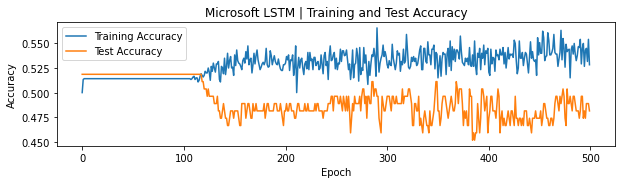

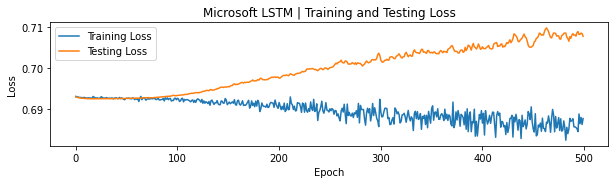

In [16]:
makePlots("Microsoft LSTM" , msftHist)

In [ ]:
makePlots("Dow Jones Industrial Average LSTM" , djiaHist)

## Bidirectional LSTM

In [ ]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

def makeBidirectionalLSTM(xTrain):
    model = Sequential()
    
    model.add (Bidirectional(LSTM(units =50 , activation = 'relu', return_sequences=True),
                             input_shape=(xTrain.shape[1], xTrain.shape[2])))
    
    model.add(Dropout(0.25))

    model.add (Bidirectional(LSTM(units = 25, activation = 'relu', return_sequences=True)))
    
    model.add(Dropout(0.25))

    model.add (TimeDistributed(Dense (units = 1, activation = 'sigmoid')))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model

### Make Bidirectional LSTM for Each Set

In [ ]:
applBiLSTM = makeBidirectionalLSTM(xTrainAppl)
msftBiLSTM = makeBidirectionalLSTM(xTrainMsft)
# djiaBiLSTM = makeBidirectionalLSTM(xTrainDjia)

### Fit Model for Each Set

In [ ]:
applBiHist = applBiLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftBiHist = msftBiLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)
# djiaBiHist = djiaBiLSTM.fit(xTrainDjia, yTrainDjia, batch_size = 72, validation_data=(xTestDjia, yTestDjia), epochs = 500, shuffle=False)

### Make Plots to Evaluate Each Model

In [ ]:
makePlots("Apple Bi-LSTM" , applBiHist)

In [ ]:
makePlots("Microsoft Bi-LSTM" , msftBiHist)

In [ ]:
makePlots("Dow Jones Industral Average Bi-LSTM" , djiaBiHist)